# Figure out isat line 6

In [1]:
import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, LineString
from shapely.affinity import scale
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
import xarray as xr
from shapely.geometry import Point
from shapely.geometry import LineString
import hvplot.xarray  # noqa
import cartopy.crs as crs
import hvplot.pandas


In [2]:
path = "/Volumes/arc_02/REMOTE_SENSING/ICESAT2/ATLAS/ATLXI/ds_subset_kamb_20200716.nc"


In [3]:
ds = xr.open_dataset(path, engine="h5netcdf")

In [4]:
# convert to pandas dataframe
dd = ds.drop_dims(['poly_exponent_x','poly_exponent_y'])
df = dd.to_dataframe()
df.reset_index(inplace=True)
df = ds[["h_corr", "utc_time","h_corr_sigma"]].to_dataframe().dropna().reset_index()

In [6]:
dh_53 = (ds.sel(cycle_number=7).h_corr-ds.sel(cycle_number=3).h_corr).to_dataframe()


In [7]:
line_name='line7'
gdf_line7 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line6'
gdf_line6 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line5'
gdf_line5 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
# study_area = gpd.read_file('/Users/home/whitefar/DATA/FIELD_ANT_19/PRE_FIELD/KISRoutes/study_area_buffer.shp')
line_name='line4'
gdf_line4 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

line_name='line3'
gdf_line3 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
line_name='line2'
gdf_line2 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")
line_name='line1'
gdf_line1 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

line_name='line0'
gdf_line0 = gpd.read_file("/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RES/PROCESSED_LINES_GISFILE/"
                        +line_name+".shp")

In [8]:
melt_area = gpd.read_file('/Users/home/whitefar/DATA/REMOTE_SENSING/REMA_2m_strips/melt_area_REMA.shp')

### Plot the data in the area to see which cycles have more relevant data

### As above but with radar lines 5-7 for reference

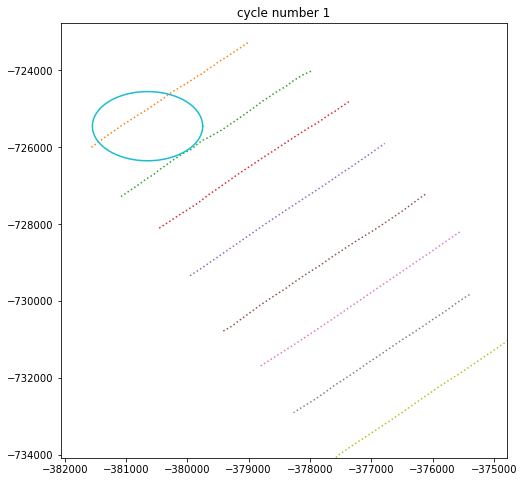

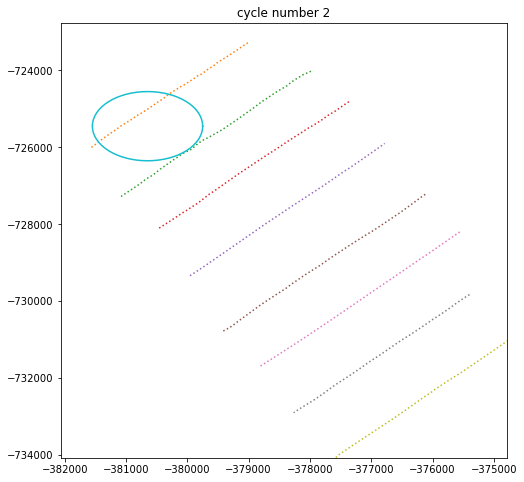

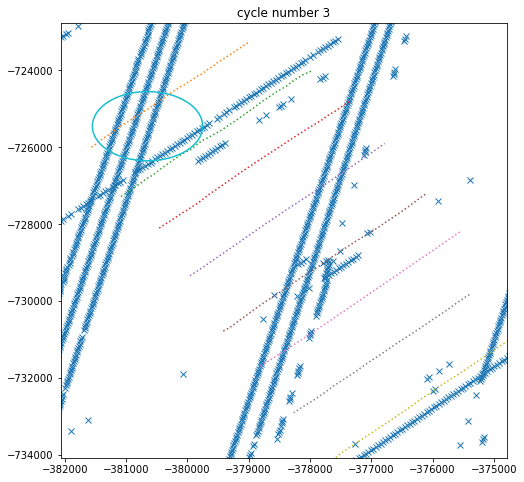

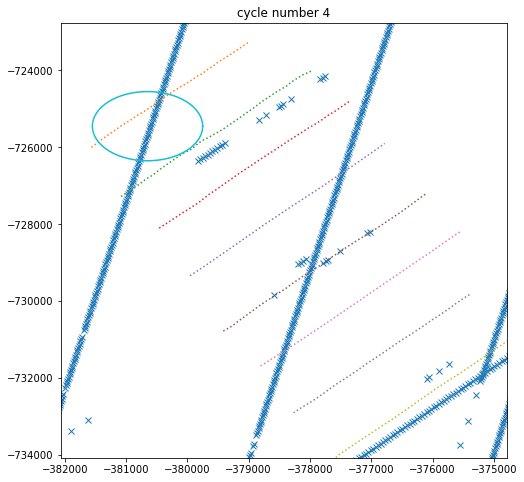

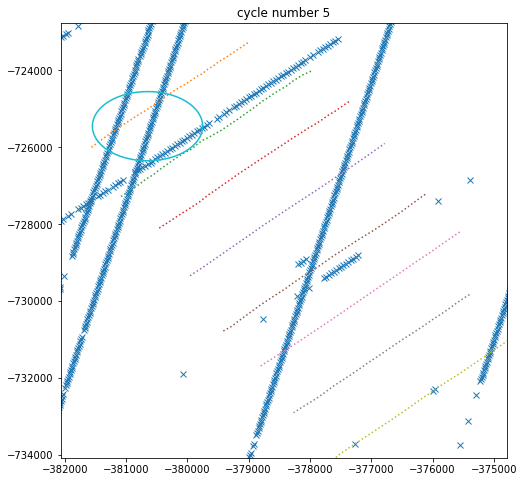

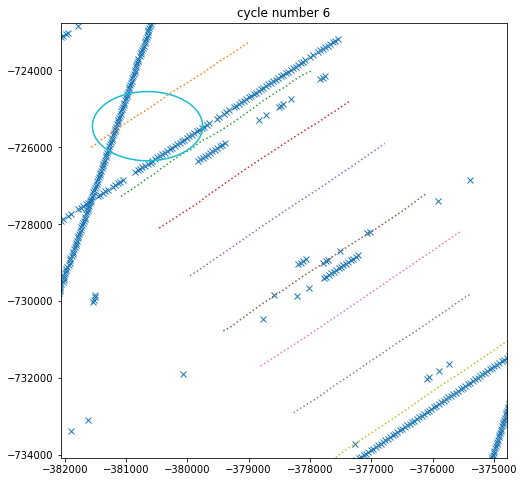

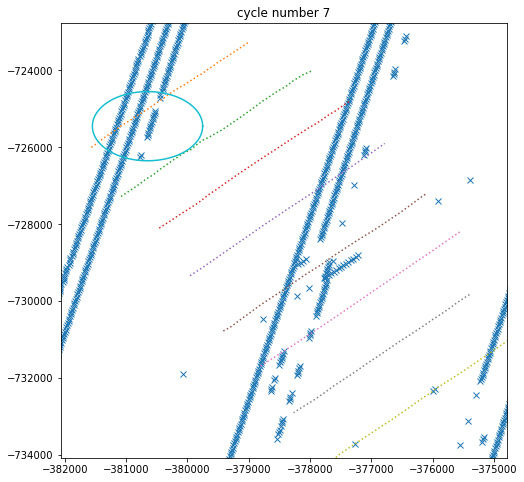

In [9]:
for cycle_number in range(1,8):

    plt.figure(figsize=(8,8))
    plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
    plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
    plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
    plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
    plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
    plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
    plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
    plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
    plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
    plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
    plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
    plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')
    
    plt.title(f"cycle number {cycle_number}")

# Cycle 3 has the most coverage
Ill use this to make line buffers, which can be used to select lines

In [10]:
da = df.query(f"x > {gdf_line7.geometry.x.min()-500} & x < {gdf_line0.geometry.x.max()} & y > {gdf_line0.geometry.y.min()} & y < {gdf_line7.geometry.y.max()+500}")

In [49]:
%matplotlib qt
plt.figure(figsize=(8,8))
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
cycle_number = 3
plt.plot(df[df.cycle_number==cycle_number].dropna().x,df[df.cycle_number==cycle_number].dropna().y,'x')
plt.plot(gdf_line7.geometry.x,gdf_line7.geometry.y,':')
plt.plot(gdf_line6.geometry.x,gdf_line6.geometry.y,':')
plt.plot(gdf_line5.geometry.x,gdf_line5.geometry.y,':')
plt.plot(gdf_line4.geometry.x,gdf_line4.geometry.y,':')
plt.plot(gdf_line3.geometry.x,gdf_line3.geometry.y,':')
plt.plot(gdf_line2.geometry.x,gdf_line2.geometry.y,':')
plt.plot(gdf_line1.geometry.x,gdf_line1.geometry.y,':')
plt.plot(gdf_line0.geometry.x,gdf_line0.geometry.y,':')
at = 2140
plt.plot(da.x.iloc[at],da.y.iloc[at],'r^')
at = 980
plt.plot(da.x.iloc[at],da.y.iloc[at],'y^')
plt.xlim(gdf_line7.geometry.x.min()-500,gdf_line0.geometry.x.max())
plt.ylim(gdf_line0.geometry.y.min(),gdf_line7.geometry.y.max()+500)
plt.plot(melt_area.iloc[0].geometry.exterior.xy[0],melt_area.iloc[0].geometry.exterior.xy[1],'-')

    
plt.title(f"cycle number {cycle_number}")

Text(0.5, 1.0, 'cycle number 3')

Line names, from south to north. Horizontal before diagonal. Ignoring the diagonals near radar line0

### parallel to line 0
- is0
- is1
- is2

### parallel to line 3
- is3
- is4
- is5

### crossing line 3
- is6
- is7 
- is8

### parallel to line 6
- is9
- is10 
- is11

### crossing line 6
- is12
- is13
- is14

In [25]:
is6 = LineString([(da.x.iloc[788],da.y.iloc[788]),(da.x.iloc[980],da.y.iloc[980])])
print(is6)

LINESTRING (-376691.5699879402 -722796.1191740253, -378990.8284925722 -734052.5693451036)


In [12]:
is4 = LineString([(da.x.iloc[24],da.y.iloc[24]),(da.x.iloc[32],da.y.iloc[32])])
print(is4)

LINESTRING (-381896.7461368341 -733380.6368849602, -377024.528257302 -728195.0649845804)
